Developing an NLP and ML project

   collecting data
    uderstanding problem
    since it is texxt we need to follow nlp pipeline
    develope ml model
    testing model 
    save model 
    load the model and test once
    Deploy in any cloud[AWS, IBM, Google cloud,MIcrosoft Azure,Heroku]

In [1]:
import numpy as np
import pandas as pd

In [2]:
#load the data set and check whether important points are available or not

In [191]:
data=pd.read_csv('E:\\nlp data sets\\spam.csv')

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

In [ ]:
#as above while loading we can notice error for that type of data sets we will have file extensions



In [192]:
data=pd.read_csv('E:\\nlp data sets\\spam.csv',encoding='ISO-8859-1')

In [193]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data.shape

(5572, 5)

#since feature(column) 3,4,5 havaing lot of null values

In [7]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
data['Unnamed: 2'].isnull().sum()

5522

In [9]:
#checking unique things in columns
for i in data.columns[2:]:
    print('unique in column', i ,'is:' , data[i].unique())
print(i)

unique in column Unnamed: 2 is: [nan ' PO Box 5249'
 ' the person is definitely special for u..... But if the person is so special'
 ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""'
 ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"'
 'this wont even start........ Datz confidence.."' 'GN' '.;-):-D"'
 'just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\""'
 ' bt not his girlfrnd... G o o d n i g h t . . .@"' ' I\'ll come up"'
 ' don\'t miss ur best life for anything... Gud nyt..."'
 ' just as a shop has to give a guarantee on what they sell. B. G."'
 ' But at d end my love compromised me for everything:-(\\".. Gud mornin:-)"'
 ' the toughest is acting Happy with all unspoken pain inside..\\""'
 ' smoke hella weed\\""' '\\" not \\"what i need to do.\\""'
 'JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aå£50 PAY RISE 4MY WORK & HAVEBEEN MADE PRESCHOOLCO-ORDINATOR 2I AM FEELINGOOD LUV\\""'
 ' justthought iåÕd sayhey! how u doin?nearly the endof me wk offda

In [10]:
data1=data.columns[2:]
data1

Index(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [11]:
# as abov we dont have any uesful thing i am removing that

for i in data.columns[2:]:
    data=data.drop(i,axis=1)

In [12]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# changing column names
data=data.rename({'v1':'target','v2':'Emails'},axis=1)

In [14]:
data.head()

,target,Emails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#let me find whethere data is balanced or not means both ham and spam in target are of equal or not

In [16]:
#checking
data['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [17]:
# we can see above it is Imbalanced ,but develop a model and see

<AxesSubplot: >

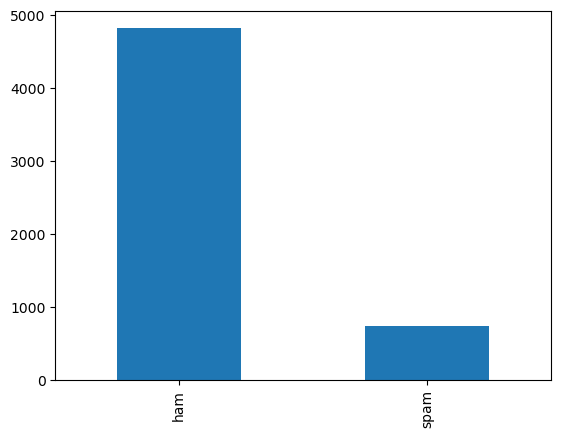

In [18]:
data['target'].value_counts().plot.bar()

In [19]:
data.head()

,target,Emails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#now preprocessing the data

-clean the data # removing punctuaitions
-lower text
-remove stop words
-apply stemming or lematization


In [23]:
# before doing i will conert dependent varaibles first

#ham=0

#spam=1
data['target']=data['target'].map({'ham':0,'spam':1}).astype(int)

In [24]:
data.head()

,target,Emails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [217]:
for i in data.index:
    print(data['target'][i])

In [216]:
for i in data.target:
    print(i)

In [ ]:
# as from both are same for collecting dependent values

In [ ]:
#for email columns

In [27]:
data.head()

,target,Emails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
#concept of regex this is used to find patterns in tetx
#for example

a='i am data scientist 35 and my number 9999'
lis=[]
lis1=[]
print(a)
temp=0
for j in a:
    for i in range(10):
        if j==str(i):
            lis.append(j)
        

    
#number=''.join(lis)
print(lis)
#print(c)
number=''.join(lis)
print(number)



i am data scientist 35 and my number 9999
['3', '5', '9', '9', '9', '9']
359999


In [ ]:
#the above we are not getting 9999 but we are also getting 35

#here comes the concept of regex 

in regex d refrs to number

In [29]:
import re
a='i am data scientist 35 and my number 9999098765'
sol=re.findall('\d{10}',a) # d is digits and {10} is combination of 10 digits
print(sol)

['9999098765']


Using regex i am collecting only text and numbers 

Eg

1)bring me 10 apples

2)bring me apples
#here above in eg 1 number plays a keyrole

In [30]:
data.head()

,target,Emails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
in regex we have a method called sub whicch keeps what we wwant and removes what we dont want

In [31]:
# whereever is scients replace science
sol=re.sub('[^a-zA-Z]',' ',a)
print(a)
print(sol)

i am data scientist 35 and my number 9999098765
i am data scientist    and my number           


In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
s=PorterStemmer()

In [36]:
# firstly checking for on rwo
cc=data['Emails'][0]
print(cc)
sol=re.sub('[^a-zA-Z0-9]',' ',cc)# removing punctuations
sol=sol.lower() # lowering text
sol=sol.split() # spliting for removing stopwords
sol=[i for i in sol if i not in stopwords.words('english')]
sol=[s.stem(j) for j in sol] # applying stemming

sol=' '.join(sol)
print(' ')
print(sol)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
 
go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [37]:
list1=[]
for i in data.index:
    sol1=re.sub('[^a-zA-Z0-9]',' ',data['Emails'][i]) #cleaning
    sol1=sol1.lower()
    sol1=sol1.split()
    sol1=[i for i in sol1 if i not in stopwords.words('english')]
    sol1=[s.stem(i) for i in sol1]
    sol1=' '.join(sol1)
    list1.append(sol1)
    
    

In [38]:
data.shape

(5572, 2)

In [39]:
len(list1)

5572

In [214]:
#print(list1)

In [ ]:
## each and every row in list1 should be convert to numbers

In [ ]:
Using tf-idf for conersion of text

In [184]:
import sklearn

In [185]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [186]:
tfv=TfidfVectorizer()

In [187]:
result=tfv.fit_transform(list1)

In [188]:
ind=result.toarray()

In [189]:
ind

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [215]:
##tfv.vocabulary_(this is for words divides tfidf in number)

In [57]:

from sklearn.preprocessing import OneHotEncoder

enc=OneHotEncoder()

In [53]:
list22=np.array(list1)

In [56]:
list22.shape
list22=list22.reshape(-1,1)
print(list22.shape)

(5572, 1)


In [60]:
res=enc.fit_transform(list22)

In [64]:
carray=res.toarray()
carray

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
carray.shape

(5572, 5106)

In [162]:
#independent data
print(ind)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [72]:
#dependent data
#data['target']
dep=data.iloc[:,0]

In [73]:
dep.head

<bound method NDFrame.head of 0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int32>

In [ ]:
# till above nlp is done

In [69]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(ind,dep, test_size=0.33, random_state=42)

In [77]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(ind,data['target'], test_size=0.33, random_state=42) #ind dep i have directly used colulum

In [78]:
len(X_train)

3733

In [79]:
len(X_train1)

3733

In [ ]:
# taking developing ml model

In [ ]:
#navie bayes
#knn
#logistic regression

In [81]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [82]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [86]:
def knn():
    knn=KNeighborsClassifier( n_neighbors=5)
    knn.fit(X_train,y_train)
    ypred=knn.predict(X_test) #test predictions
    print(accuracy_score(y_test,ypred))
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    

In [87]:
knn()

0.8977705274605764
[[1587    0]
 [ 188   64]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1587
           1       1.00      0.25      0.41       252

    accuracy                           0.90      1839
   macro avg       0.95      0.63      0.67      1839
weighted avg       0.91      0.90      0.87      1839



C:\Users\RGUKT\anaconda3\envs\newanaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [89]:
 (1587+64)/(188+1587+64)
    

0.8977705274605764

In [93]:
#logestic regression

def loge():
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    ypred=lr.predict(X_test) #test predictions
    print(accuracy_score(y_test,ypred))
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    
    
    

In [94]:
loge()


0.9434475258292551
[[1579    8]
 [  96  156]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1587
           1       0.95      0.62      0.75       252

    accuracy                           0.94      1839
   macro avg       0.95      0.81      0.86      1839
weighted avg       0.94      0.94      0.94      1839



In [95]:
(1579+156)/(1579+156+8+96)

0.9434475258292551

In [195]:
#using navie baisa
def navi():
    nv=MultinomialNB()
    nv.fit(X_train,y_train)
    ypred=nv.predict(X_test) #test predictions
    print(accuracy_score(y_test,ypred))
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    

In [196]:
navi()

0.965742251223491
[[1587    0]
 [  63  189]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1587
           1       1.00      0.75      0.86       252

    accuracy                           0.97      1839
   macro avg       0.98      0.88      0.92      1839
weighted avg       0.97      0.97      0.96      1839



In [98]:
(1578+189)/(1578+189+63)

0.9655737704918033

In [102]:
def calling():
    print('........knn..........')
    print(' ')
    knn()
    print(' ')
    print('logestic')
    loge()
    print(' ')
    print('Naivebayes')
    navi()  

In [103]:
calling()

........knn..........
 


C:\Users\RGUKT\anaconda3\envs\newanaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8977705274605764
[[1587    0]
 [ 188   64]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1587
           1       1.00      0.25      0.41       252

    accuracy                           0.90      1839
   macro avg       0.95      0.63      0.67      1839
weighted avg       0.91      0.90      0.87      1839

 
logestic
0.9434475258292551
[[1579    8]
 [  96  156]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1587
           1       0.95      0.62      0.75       252

    accuracy                           0.94      1839
   macro avg       0.95      0.81      0.86      1839
weighted avg       0.94      0.94      0.94      1839

 
Naivebayes
0.965742251223491
[[1587    0]
 [  63  189]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1587
           1       1.00      0.75      0.86       252

    accuracy         

In [ ]:
# from above by seeing classification report i am going to use navie bais moel

In [199]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
#my model is ready now 

In [206]:
# this is i want to check with my model
def prediction(text):
    c=[]
    sol9=re.sub('[^a-zA-Z0-9]',' ',text)# removing punctuations
    sol9=sol9.lower() # lowering text
    sol9=sol9.split() # spliting for removing stopwords
    sol9=[i for i in sol9 if i not in stopwords.words('english')]
    sol9=[s.stem(j) for j in sol9] # applying stemming
    sol9=' '.join(sol9)
    c.append(sol9) #appending final text to list
    final=tfv.transform(c) #converting into numbers by tf_idf vectorization
    array1=final.toarray()
    res=model.predict(array1)
    if res[0]==0:
        print('the email is ham') #as we declare 0 as ham
    else:
        print('the mail is spam') #as 1 is spam
    



In [205]:
prediction('I went to a movie and movie was really good and Mostly it will be a sensation')

ham


In [208]:
data['v2'][0] #belongs to ham

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [210]:
# this should be ham because 1st in data set is ham
prediction('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

the email is ham


In [211]:
data['v2'][2] # this is spam

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [212]:
prediction(data['v2'][2])

the mail is spam


In [213]:
prediction("""
ajor sca“Join my Telegram Group for FREE stock tips”

“Learn A to Z about Options Trading for just 69999”

Every day many innocent people fall for such headlines and lose their hard-earned money to frauds, who sell the idea of high returns within a short time to them.

It has become essential for a trader to know all the ways he can get scammed.

To help you do that, we have launched our new web series, “Frauds of Tradingpur” where we highlight all the mms happening in the stock ma
""")

the email is ham


In [209]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
